# **Data Loading and Initial Analysis**
# Load the data and inspect its structure.
# Plot a histogram to visualize the score distribution

     Name Registration Number  Score (%)  Hours Studied  Group
0  dcdgsf              454256         60             18      1
1  sachin          2201020352         20             10      1
2   Dhoni          2201020352         20             10      2
3   Virat          2201020018         60             18      1
4  Goutam          2201020023         60             18      2
        Score (%)  Hours Studied       Group
count  402.000000     402.000000  402.000000
mean    50.604478       7.977612    4.487562
std     28.708880       6.144721    3.210192
min      0.000000       1.000000    1.000000
25%     23.000000       4.000000    2.000000
50%     53.000000       7.000000    2.000000
75%     80.000000      10.000000    8.000000
max    100.000000      25.000000    8.000000


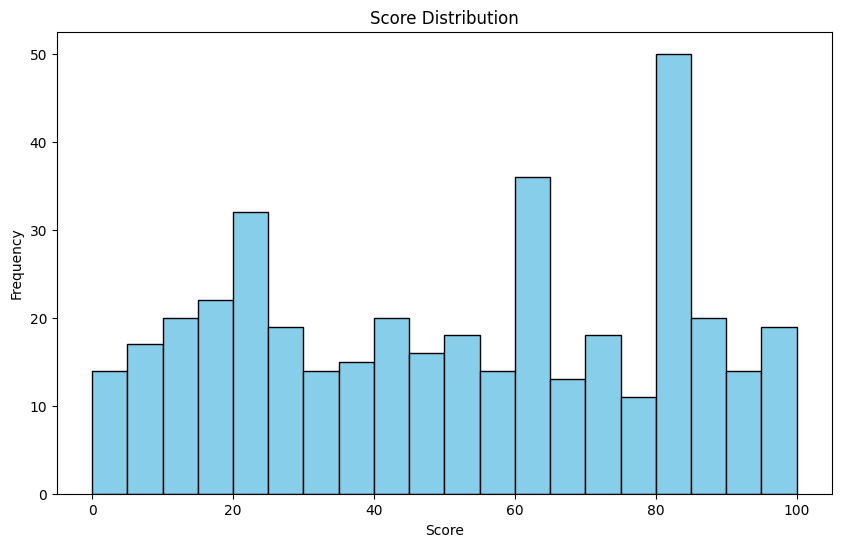

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/OMR_Results.xlsx'
data = pd.read_excel(file_path)

print(data.head())
print(data.describe())

plt.figure(figsize=(10, 6))
plt.hist(data['Score (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# **Clustering Analysis (K-Means)**
# Standardize the score data and apply K-Means clustering.
# Visualize clusters based on Hours Studied and Score (%).

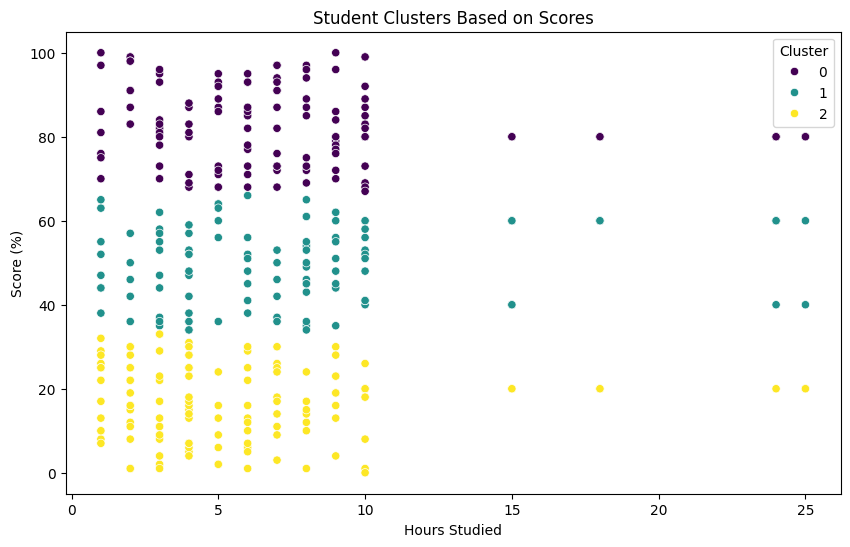

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Score (%)']])

# Apply KMeans
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Studied', y='Score (%)', hue='Cluster', data=data, palette='viridis')
plt.title('Student Clusters Based on Scores')
plt.show()


# **Logistic Regression Analysis**
# Train a logistic regression model to predict pass/fail based on hours studied.
# Evaluate the model with a confusion matrix and classification report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split  # Import train_test_split
import pandas as pd

# Create a pass/fail column
data['Pass/Fail'] = data['Score (%)'].apply(lambda x: 1 if x >= 50 else 0)
data.to_excel('OMR_Results.xlsx', index=False)

# Logistic regression model
X = data[['Hours Studied']]
y = data['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12 19]
 [16 34]]
              precision    recall  f1-score   support

           0       0.43      0.39      0.41        31
           1       0.64      0.68      0.66        50

    accuracy                           0.57        81
   macro avg       0.54      0.53      0.53        81
weighted avg       0.56      0.57      0.56        81



# **Correlation Analysis**
# Analyze and visualize the correlation between Score (%) and Hours Studied.

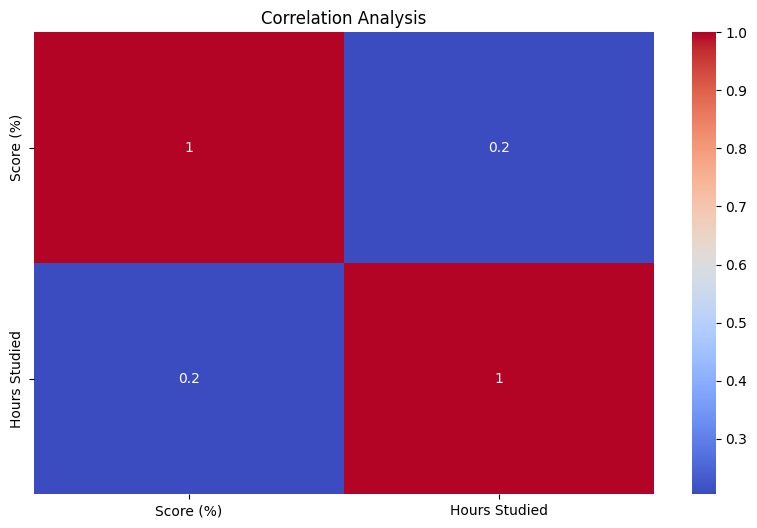

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data[['Score (%)', 'Hours Studied']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


# **Principal Component Analysis (PCA)**
# Reduce dimensions of Hours Studied and Score (%) using PCA.
# Visualize data in the new principal component space.

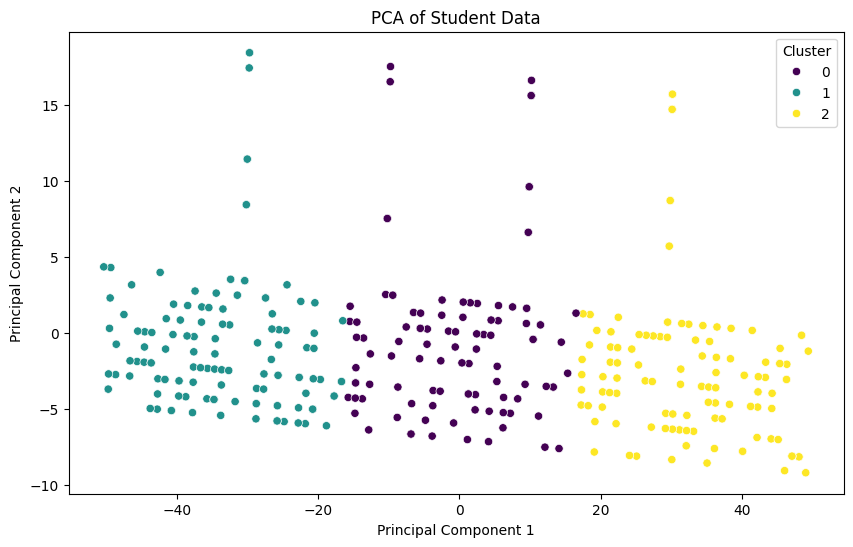

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['Hours Studied', 'Score (%)']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('PCA of Student Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
